In [22]:
# 导入所需要的包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jieba

import jieba
import matplotlib.pyplot as plt
import pandas as pd
from imageio import imread  # pip install pillow
from wordcloud import WordCloud

In [23]:
# 读取数据
train = pd.read_excel('./data/data.xlsx')
test = pd.read_excel('./data/test.xlsx')
data_数据说明 = pd.read_excel('./data/字段说明.xlsx')

In [25]:
train[train['target']==1].groupby('sellerId')['target'].value_counts().sort_values(ascending = False)[:3]

sellerId  target
971       1         44
1173      1         16
961       1         14
Name: target, dtype: int64

In [27]:
train[train['sellerId']==971].shape

(50, 5)

In [5]:
train[train['sellerId']==971]['target'].value_counts()

1    44
0     6
Name: target, dtype: int64

In [6]:
text = ''
for i in train[train['sellerId']==971]['comment'].tolist():
    text+=i.replace('text','')
text

'：送餐人员态度恶劣，等了超过一个半小时，送来以后还骂人，叫过这么多次外卖从没见过这种送餐人员：超过预计时间,太慢,不好吃,有点凉了：量少啦点，：全是肉。有点干：送货时间太长！！！：汤依旧是难以下咽：特别少,菜也就半盒多一点：评分给的低就是针对服务态度，接线员工态度太差。建议以后订餐能等就等，别打人家电话催单：今天太慢了~：给我真的送的饮料洒了,很多,袋子也湿了很多：米线全撒了！都没汤，米线都漏出来了！！巨恶心！：时间有些长：时间长了，筷子也没给：太慢了,那么近要一个小时才送来：接线员态度极其差：有点偏淡～：太慢了，送了90分钟。：鸡汤咸死，无法入囗！：一个半小时才送到，货没送到还不能取消订单，打拒接：好方便，用了代金券比去店里买还划算：吃了一年了一家店。现在彻底失望了。锅包肉现在像溜肉段了。味道也变了好多。还有就是这快递送来了没有筷子？问他筷子呢？结果他的意思是我真的把筷子吃了。百度外卖改良一下吧。：肘子有点坏了，，都酸了。。：配送速度超级慢：土匪猪肝不新鲜，其他菜也不好吃：不好吃还贵，量少：快递态度好，速度快：菜的味道实在不怎么样：味道有点淡：份量少了一半吧：菜越来越少了！米饭也少了！：送餐员态度特别差：菜量小,太少：吃了拉肚子：点的俩菜都不好吃,还挺贵一共96：等的花儿都谢了：时间太慢,没胃口：配送慢，还要下楼去拿：口味一般，焦溜丸子不好吃：谢谢骑士，辛苦了～～：卷饼里面建议放点酱之类,那样应该会更好吃：牛肉粥肉有点少,而且盒子到的时候都压扁l：涨价拉、就不想吃拉：等了一个多小时，我真的也是醉了！：接错单了，时间长了些：超级恶心,取了半个小时,送了45分钟,不给打电话还不给送呢,张嘴就瞎话,说在楼底下了,出去等半天也没人,还差3分钟就半价了,早知道不尼玛给你打电话了,直接半价拉倒,星冰乐一点冰都没有了,奶油也全泡没了,咖啡也洒了点,最快一次一人13分钟送来了,你TM送了1个半小时,人比人得死,货比货得仍啊：垃圾食品吃完中毒啦！！！！！！：太！慢！了！：鸡肉味、牛肉味，不名物~~~：没给我真的餐具！！！：备注18:00送，17点多就打电话要求送，孩子拿到手全身凉的，难吃！'

In [16]:
from jieba import analyse
lis = jieba.analyse.extract_tags(text, withWeight = True, topK=11)   # 要求返回权重值


In [19]:
score = pd.DataFrame(columns=['名词','重要性'])

score['名词'] = [i[0] for i in lis]
score['重要性'] = [i[1] for i in lis]
score = score[1:]

0.20085414827385895 太慢
0.13937954830954358 有点
0.1313564422687137 筷子
0.12006175700497926 送来
0.11920933774294606 小时
0.11077956252082988 分钟
0.10156530205294606 时间
0.10048894757427386 外卖
0.09920968882074688 送餐
0.09920968882074688 量少


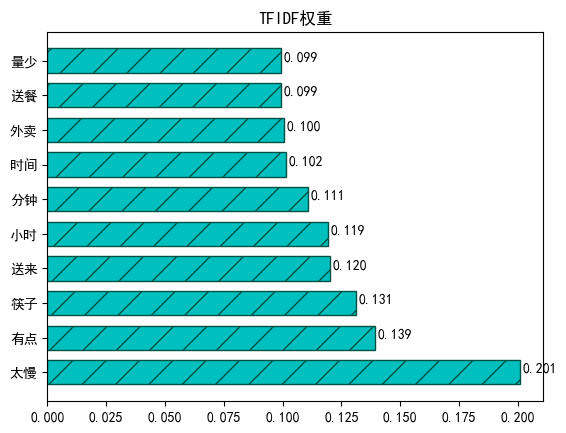

In [21]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文黑体
# plt.rcParams['axes.unicode_minus'] = False # 负值显示
plt.barh(score['名词'], score['重要性'], height=0.7, color="c",hatch="/",edgecolor='#005344') # 更多颜色可参见颜色大全
# plt.xlabel('feature importance') # x 轴
# plt.ylabel('features') # y轴
plt.title('TFIDF权重') # 标题
for a,b in zip( score['重要性'],score['名词']): # 添加数字标签
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a)) # a+0.001代表标签位置在柱形图上方0.001处
plt.show()

In [8]:
words = jieba.lcut(text)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dupeibo\AppData\Local\Temp\jieba.cache
Loading model cost 0.761 seconds.
Prefix dict has been built successfully.


In [33]:
stop = pd.read_csv('E:\\Learn File\\大一\\大一爬虫\\spider\\week8\\word_cloud\\stoplist.txt', header=None, encoding='utf-8',engine='python', sep='limh')
b = stop.drop_duplicates()
stop = [' ', '　','送'] + list(stop[0])
# stop1 = [chr(32), chr(12288)] + list(stop[0])
# stop = stop.remove('不')
stop = set(stop)
# 去停用词
words = [word for word in words if word not in stop]
word_num = pd.DataFrame(words, columns=['word'])
word_num = word_num[word_num['word'] != '\n']
word_num['count'] = 1
word_num = word_num.groupby('word').sum()
word_many = word_num[word_num['count'] > 2]

In [34]:
word_num.sort_values(by='count',ascending=False)[:10]

,count
word,
时间,6
好吃,6
吃,5
太慢,5
菜,5
小时,5
少,5
长,4
筷子,4


C:\Users\dupeibo\AppData\Local\Temp\ipykernel_31116\2563797964.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  back_pic = imread("E:\\111.jpg")  # aixin.jpg # 设置背景图片


(-0.5, 1199.5, 957.5, -0.5)

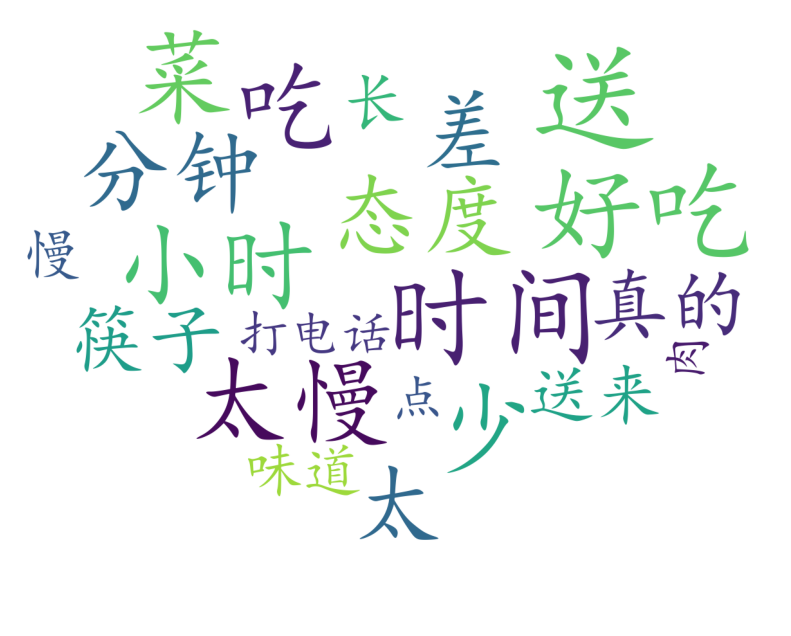

In [14]:

# 背景图片
back_pic = imread("E:\\111.jpg")  # aixin.jpg # 设置背景图片
wc = WordCloud(font_path='C:\\Windows\\Fonts\\simkai.TTF',  # 设置字体 使用的 windows 自带的字体
               background_color="white",  # ="white", #背景颜色
               max_words=2000,  # 词云显示的最大数
               mask=back_pic,  # 设置背景图片
               max_font_size=200,  # =200, #字体最大值
               random_state=42, )

# 生成词云
wc.fit_words(word_many['count'])

# 绘图
plt.figure(figsize=(16, 8))
plt.imshow(wc)
plt.axis('off')